In [66]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

In [67]:
times_to_repeat = 1000
alphas = [0.5, 1, 1.5]
n_windows = [500, 1000, 1500]
legend = [f"alpha = {alpha}" for alpha in alphas]
x_label = "pos in queue"
y_label = "mean time"

### A
Рассмотрим вначале случай, когда каждое из окошек может обслужить только 2 человека. Понятно, что тогда нам надо генерировать только один набор данных, так как каждый ждет просто освободившееся место

In [68]:
def max_2_experiment(n, alpha):
    res = np.zeros(n)
    for i in range(times_to_repeat):
        data = np.sort(np.random.exponential(1/alpha, n))
        res += data
    return res/times_to_repeat

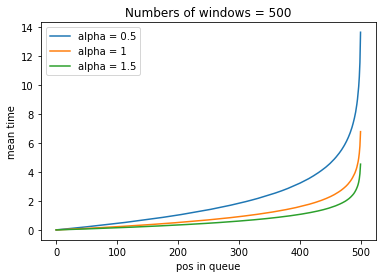

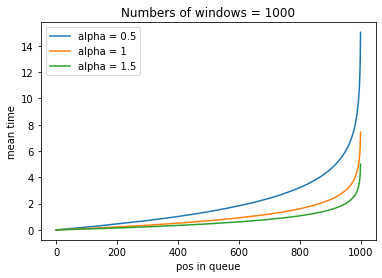

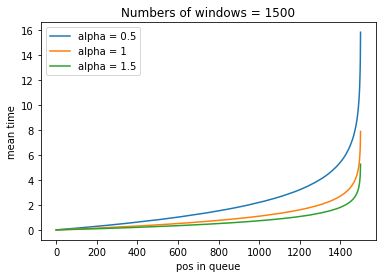

In [69]:
for n in n_windows:
    x = np.arange(n)
    for alpha in alphas:
        y = max_2_experiment(n, alpha)
        plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Numbers of windows = {n}")
    plt.legend(legend)
    plt.show()

#### Выводы
Действительно, получаем зависимость, похожую на экспоненциальную, то есть на ту, которую мы и прогнозировали теоритически. Еще можно заметить, что последний человек ждет сильно дольше, чем предыдущие. 

### B
Рассмотрим теперь случай, когда окно может обслужить сколько угодно человек

In [70]:
queue_sizes = [1500, 2500]
n_windows = [500, 1000]

In [71]:
def one_epoch(n, q_size, alpha):
    result = np.zeros(q_size)
    times = list(np.random.exponential(1/alpha, n))
    heapq.heapify(times)
    for i in range(result.size):
        result[i] = heapq.heappop(times)
        heapq.heappush(times, result[i] + np.random.exponential(1/alpha))
    return result

In [72]:
def unlimited_experiment(n, q_size, alpha):
    res = np.zeros(q_size)
    for i in range(times_to_repeat):
        data = one_epoch(n, q_size, alpha)
        res += data
    return res/times_to_repeat

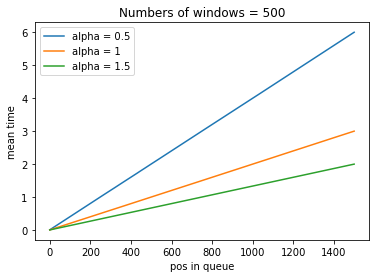

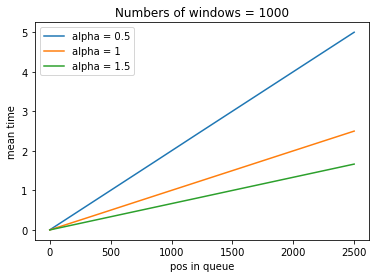

In [73]:
for n, q_size in zip(n_windows, queue_sizes):
    x = np.arange(q_size)
    for alpha in alphas:
        y = unlimited_experiment(n, q_size, alpha)
        plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Numbers of windows = {n}")
    plt.legend(legend)
    plt.show()

В данном случае экспериментально мы получаем линейную зависимость 